# K-nearest neighbors and scikit-learn

## Agenda

1. Review of the iris dataset
2. Human learning on the iris dataset
3. K-nearest neighbors (KNN) classification
4. Review of supervised learning
5. Benefits and drawbacks of scikit-learn
6. Requirements for working with data in scikit-learn
7. scikit-learn's 4-step modeling pattern
8. Tuning a KNN model
9. Comparing KNN with other models

## Lesson goals

1. Learn how the modeling process works
2. Learn how scikit-learn works
3. Learn how KNN works

## Review of the iris dataset

In [1]:
from IPython.display import Image
%matplotlib inline 

In [2]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Terminology

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

## Human learning on the iris dataset

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** has measurements similar to **previous irises**, then its species is most likely the same as those previous irises.

In [4]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [5]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

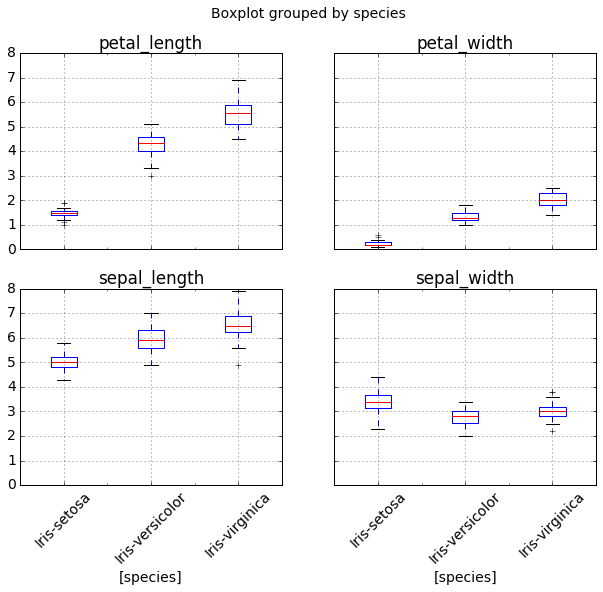

In [6]:
# box plot of all numeric columns grouped by species
iris.drop('species_num', axis=1).boxplot(by='species', rot=45);

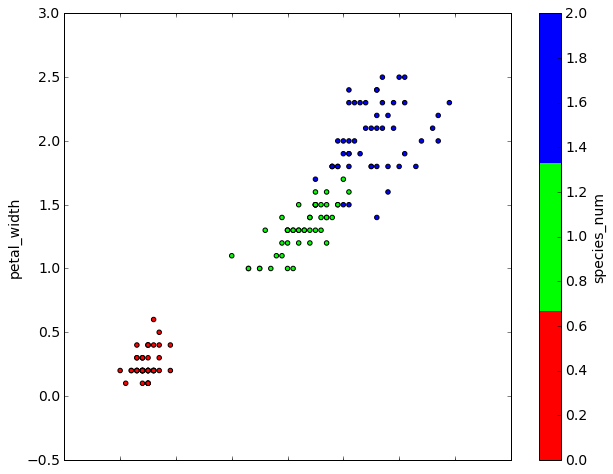

In [7]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

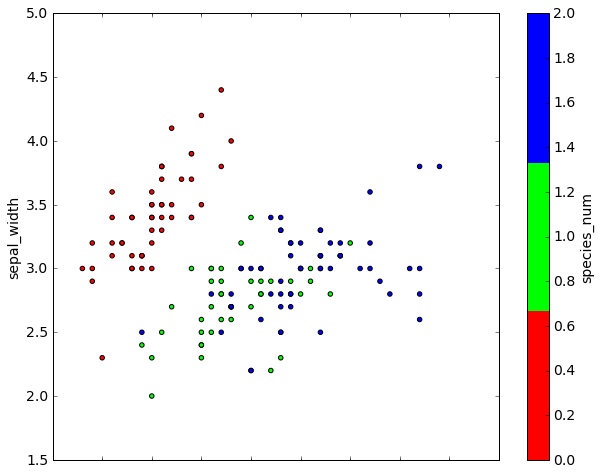

In [8]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold);

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

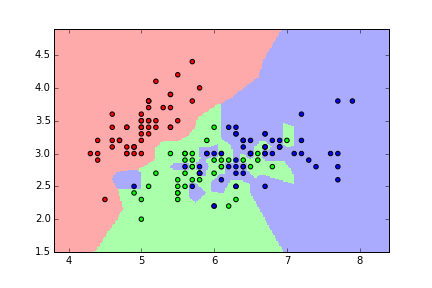

In [9]:
### KNN classification map for iris (K=1)
Image("../../assets/images/iris_01nn_map.png")

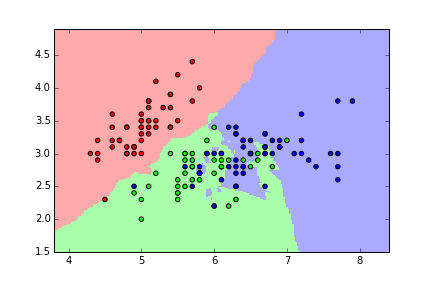

In [10]:
### KNN classification map for iris (K=5)
Image("../../assets/images/iris_05nn_map.png")

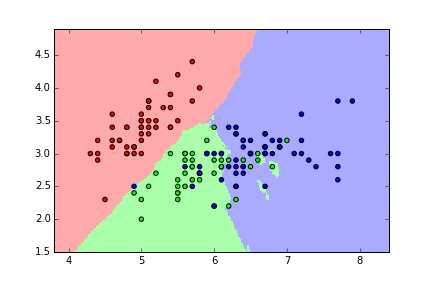

In [11]:
### KNN classification map for iris (K=15)
Image("../../assets/images/iris_15nn_map.png")

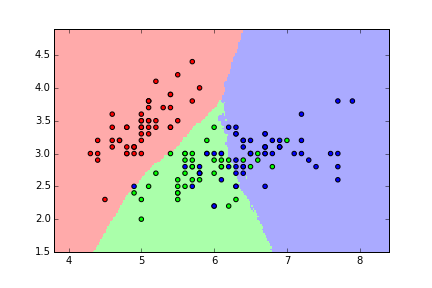

In [12]:
### KNN classification map for iris (K=50)
Image("../../assets/images/iris_50nn_map.png")

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on **unseen data**. We want to create a model that generalizes!

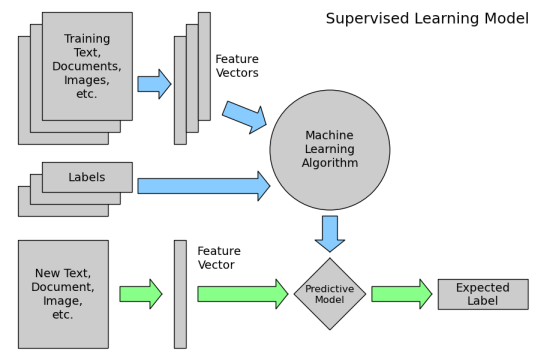

In [13]:
## Review of supervised learning
Image("../../assets/images/supervised_learning.png")

## Benefits and drawbacks of scikit-learn

**Benefits:**

- Consistent interface to machine learning models
- Provides many tuning parameters but with sensible defaults
- Exceptional documentation
- Rich set of functionality for companion tasks
- Active community for development and support

**Potential drawbacks:**

- Harder (than R) to get started with machine learning
- Less emphasis (than R) on model interpretability

Ben Lorica: [Six reasons why I recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

## Requirements for working with data in scikit-learn

1. Features and response should be **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily converted to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [15]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [16]:
# alternative ways to create "X"
X = iris.drop(['species', 'species_num'], axis=1)
X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:, 0:4]

In [17]:
# store response vector in "y"
y = iris.species_num

In [18]:
# check X's type
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [19]:
# check y's type
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [20]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

(150, 4)


In [21]:
# check y's shape (single dimension with length n)
print(y.shape)

(150L,)


## scikit-learn's 4-step modeling pattern

**Step 1:** Import the class you plan to use

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [22]:
# make an instance of a KNeighborsClassifier object with 1 neighbor


- Created an object that "knows" how to do K-nearest neighbors classification, and is just waiting for data
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

**Step 3:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place

- Once a model has been fit with data, it's called a "fitted model"

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [23]:
knn.predict([[3, 5, 4, 2]])

NameError: name 'knn' is not defined

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [27]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]


## Tuning a KNN model

In [ ]:
# instantiate the model (using the value K=5)

# fit the model with data

# predict the response for new observations
knn.predict(X_new)

**Question:** Which model produced the correct predictions for the two unknown irises?

**Answer:** We don't know, because these are **out-of-sample observations**, meaning that we don't know the true response values. Our goal with supervised learning is to build models that generalize to out-of-sample data. However, we can't truly measure how well our models will perform on out-of-sample data.

**Question:** Does that mean that we have to guess how well our models are likely to do?

**Answer:** Thankfully, no. In the next class, we'll discuss **model evaluation procedures**, which allow us to use our existing labeled data to estimate how well our models are likely to perform on out-of-sample data. These procedures will help us to tune our models and choose between different types of models.

In [ ]:
# calculate predicted probabilities of class membership
knn.predict_proba(X_new)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

###What happen if we view the accuracy of our training training data?

In [28]:
# initialize
k_range = range(1, 10)
scores = []

for k in k_range:
    # instantiate model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit model
    knn.fit(X,y)
    # predict model and store 
    y_pred = knn.predict(X_new)
    print(y_pred)    
    score = knn.score(X_new,y_pred)*100    
    print "Score is ", knn.score(X_new,y_pred)*100,"for k is :", k
    scores.append([k, score])    
print(scores)

[2 1]
Score is  100.0 for k is : 1
[1 1]
Score is  100.0 for k is : 2
[1 1]
Score is  100.0 for k is : 3
[1 1]
Score is  100.0 for k is : 4
[1 1]
Score is  100.0 for k is : 5
[1 1]
Score is  100.0 for k is : 6
[1 1]
Score is  100.0 for k is : 7
[1 1]
Score is  100.0 for k is : 8
[1 1]
Score is  100.0 for k is : 9
[[1, 100.0], [2, 100.0], [3, 100.0], [4, 100.0], [5, 100.0], [6, 100.0], [7, 100.0], [8, 100.0], [9, 100.0]]


In [74]:
scores = []
for k in range(1,100):
    # instantiate model

    # fit model
    
    # store prediction

    
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

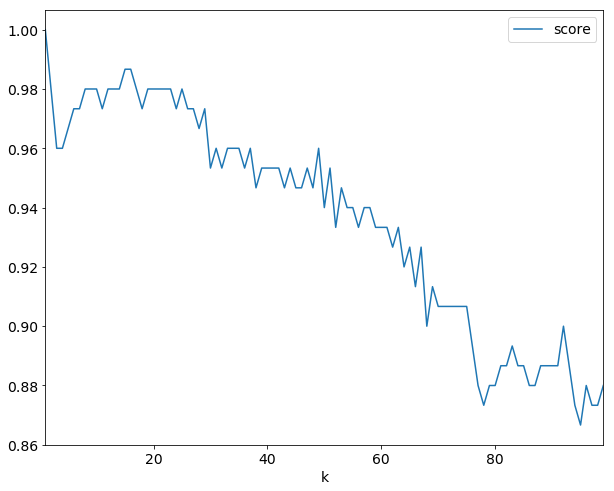

In [75]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');  

## Comparing KNN with other models

**Advantages of KNN:**

- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression
- Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular

**Disadvantages of KNN:**

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods